In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eestech-challenge-2-local-round-xanthi/validation_set.csv
/kaggle/input/eestech-challenge-2-local-round-xanthi/training_set.csv


In [2]:
data = pd.read_csv('../input/eestech-challenge-2-local-round-xanthi/training_set.csv')
data.head()

,AGE,WORKER-CLASS,EDUCATION,MARITAL-STATUS,OCCUPATION,PLACE-OF-BIRTH,RELATIONSHIP,WORK-HOURS,SEX,RACE,INCOME
0,65,NaN,15.0,1,NaN,6,1,NaN,2,1,7800.0
1,80,NaN,22.0,5,NaN,6,0,NaN,2,1,61300.0
2,72,NaN,21.0,3,NaN,233,6,NaN,1,6,10800.0
3,47,1.0,21.0,1,10.0,36,1,60.0,1,1,493000.0
4,25,NaN,16.0,1,NaN,6,10,NaN,2,8,0.0


In [3]:
data.head()

,AGE,WORKER-CLASS,EDUCATION,MARITAL-STATUS,OCCUPATION,PLACE-OF-BIRTH,RELATIONSHIP,WORK-HOURS,SEX,RACE,INCOME
0,65,NaN,15.0,1,NaN,6,1,NaN,2,1,7800.0
1,80,NaN,22.0,5,NaN,6,0,NaN,2,1,61300.0
2,72,NaN,21.0,3,NaN,233,6,NaN,1,6,10800.0
3,47,1.0,21.0,1,10.0,36,1,60.0,1,1,493000.0
4,25,NaN,16.0,1,NaN,6,10,NaN,2,8,0.0


In [4]:
data.shape

(297733, 11)

In [5]:
data.isnull().sum()

AGE                    0
WORKER-CLASS       79206
EDUCATION              0
MARITAL-STATUS         0
OCCUPATION         79206
PLACE-OF-BIRTH         0
RELATIONSHIP           0
WORK-HOURS        105695
SEX                    0
RACE                   0
INCOME                 0
dtype: int64

In [6]:
mis_val = data.isnull().sum()
mis_val = mis_val[mis_val > 0]
mis_val.sort_values(ascending=False)

WORK-HOURS      105695
WORKER-CLASS     79206
OCCUPATION       79206
dtype: int64

In [7]:
#replace other NaNs with mean
data.fillna(data.mean(), inplace=True)

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

AGE               0
WORKER-CLASS      0
EDUCATION         0
MARITAL-STATUS    0
OCCUPATION        0
PLACE-OF-BIRTH    0
RELATIONSHIP      0
WORK-HOURS        0
SEX               0
RACE              0
INCOME            0
dtype: int64

In [10]:
data.head()

,AGE,WORKER-CLASS,EDUCATION,MARITAL-STATUS,OCCUPATION,PLACE-OF-BIRTH,RELATIONSHIP,WORK-HOURS,SEX,RACE,INCOME
0,65,2.219831,15.0,1,4097.515923,6,1,37.938996,2,1,7800.0
1,80,2.219831,22.0,5,4097.515923,6,0,37.938996,2,1,61300.0
2,72,2.219831,21.0,3,4097.515923,233,6,37.938996,1,6,10800.0
3,47,1.000000,21.0,1,10.000000,36,1,60.000000,1,1,493000.0
4,25,2.219831,16.0,1,4097.515923,6,10,37.938996,2,8,0.0


In [11]:
data.shape

(297733, 11)

<AxesSubplot:>

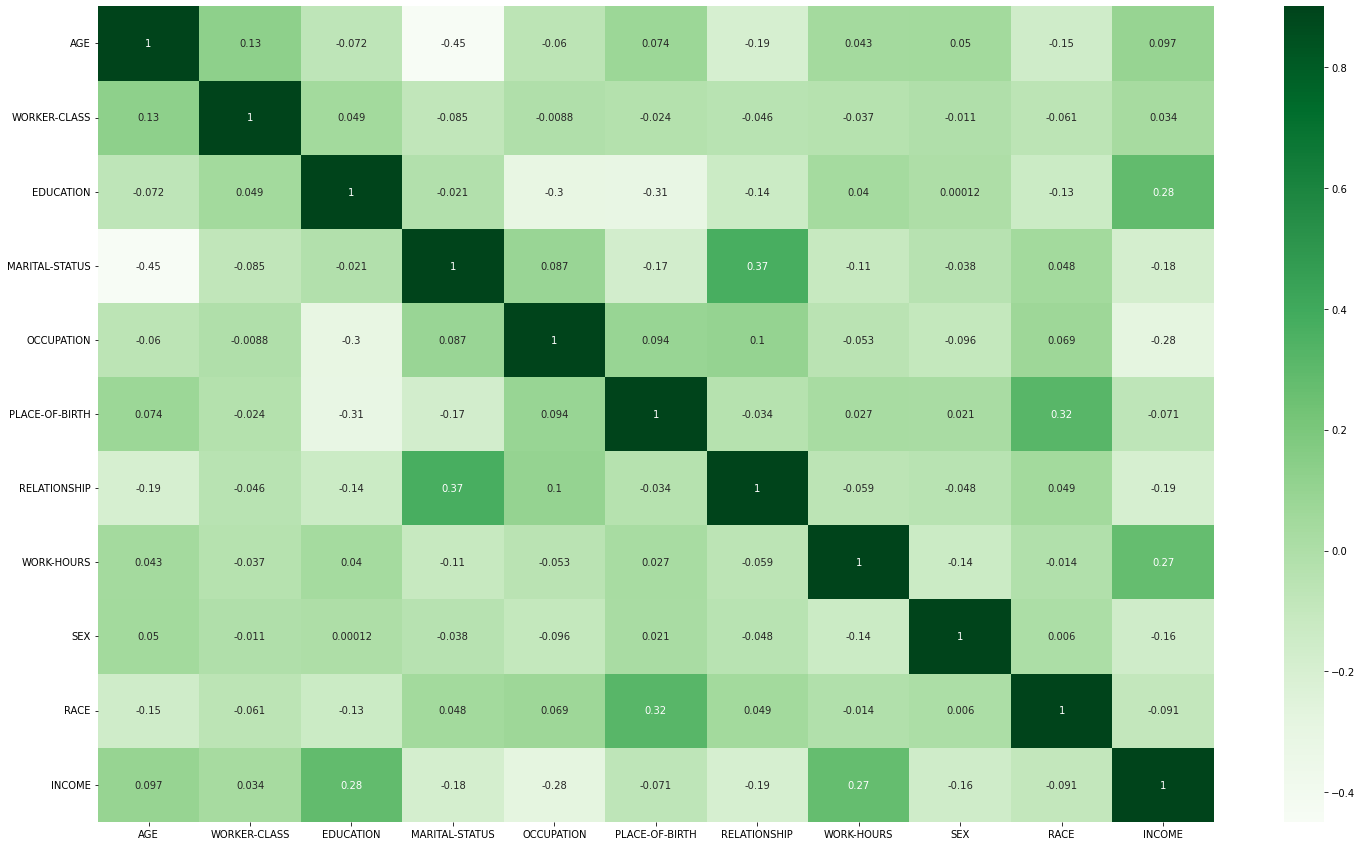

In [12]:
corr_matrix = data.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(corr_matrix, vmax=0.9, annot=True, cmap="Greens")

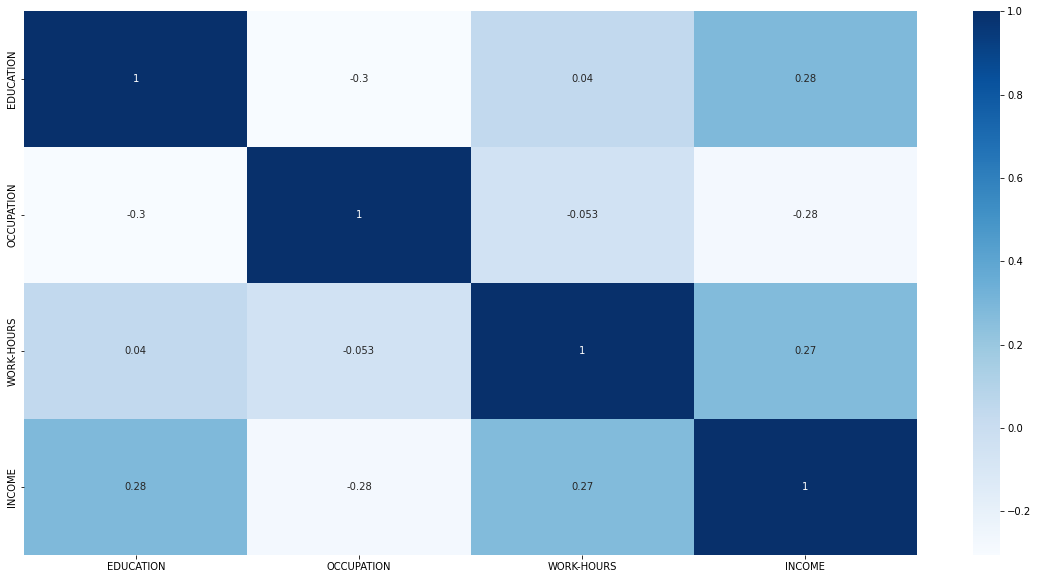

In [13]:
corr_matrix = data.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["INCOME"])>0.2]
plt.figure(figsize=(20,10))

g = sns.heatmap(data[top_corr_features].corr(),
                annot=True,
                cmap="Blues")

In [14]:
#data.drop(['AGE', 'WORKER-CLASS', 'MARITAL-STATUS', 'PLACE-OF-BIRTH', 'RELATIONSHIP', 'SEX', 'RACE'], axis = 1, inplace = True)

data.drop(['WORKER-CLASS', 'PLACE-OF-BIRTH', 'RELATIONSHIP', 'SEX', 'RACE'], axis = 1, inplace = True)

In [15]:
data.shape

(297733, 6)

In [16]:
data.head()

,AGE,EDUCATION,MARITAL-STATUS,OCCUPATION,WORK-HOURS,INCOME
0,65,15.0,1,4097.515923,37.938996,7800.0
1,80,22.0,5,4097.515923,37.938996,61300.0
2,72,21.0,3,4097.515923,37.938996,10800.0
3,47,21.0,1,10.000000,60.000000,493000.0
4,25,16.0,1,4097.515923,37.938996,0.0


In [17]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.3,random_state=0)
    
train_X=train[train.columns[:5]].to_numpy()
train_Y=train[train.columns[5:]].to_numpy().ravel()
test_X=test[test.columns[:5]].to_numpy()
test_Y=test[test.columns[5:]].to_numpy().ravel()


In [18]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape )

(208413, 5) (208413,) (89320, 5) (89320,)


In [19]:
print(train_Y)

[ 40800.      0. 208000. ...  40000.  80750.      0.]


In [20]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_X, train_Y)

# Make predictions using the testing set
y_pred = regr.predict(test_X)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_Y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_Y, y_pred))


Coefficients: 
 [  145.32408601  3542.82774652 -4662.14217418    -5.77494799
  1649.75121786]
Mean squared error: 4116339739.00
Coefficient of determination: 0.20


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

rf = RandomForestRegressor(n_estimators=100)
rf.fit(train_X, train_Y)

y_pred_train = rf.predict(train_X)
y_pred = rf.predict(test_X)

mse_train = mean_squared_error(train_Y, y_pred_train)
rmse_train = math.sqrt(mse_train)
mae_train = mean_absolute_error(train_Y, y_pred_train)
r2_train = r2_score(train_Y, y_pred_train)

mse = mean_squared_error(test_Y, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print(f"[Training set] MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R^2: {r2_train:.4f}\n",
      f"[Testing set] MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

[Training set] MSE: 1097464210.3913, RMSE: 33127.9974, MAE: 15363.4374, R^2: 0.7785
 [Testing set] MSE: 3485164106.5918, RMSE: 59035.2785, MAE: 28242.3861, R^2: 0.3252
